In [ ]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 sns.set(color_codes=True)

tabulation

In [ ]:
!wget https://api.covid19india.org/states_daily.json

--2021-08-22 07:07:19--  https://api.covid19india.org/states_daily.json
Resolving api.covid19india.org (api.covid19india.org)... 173.194.217.121, 2607:f8b0:400c:c0b::79
Connecting to api.covid19india.org (api.covid19india.org)|173.194.217.121|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://data.covid19india.org/states_daily.json [following]
--2021-08-22 07:07:19--  http://data.covid19india.org/states_daily.json
Resolving data.covid19india.org (data.covid19india.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to data.covid19india.org (data.covid19india.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.covid19india.org/states_daily.json [following]
--2021-08-22 07:07:19--  https://data.covid19india.org/states_daily.json
Connecting to data.covid19india.org (data.covid19india.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting

In [ ]:
import urllib.request
url= 'https://api.covid19india.org/states_daily.json '
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7fab3c7ac0d0>)

In [ ]:
covid_data=pd.read_json('data.json')

In [ ]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
1558,"{'an': '2', 'ap': '1835', 'ar': '255', 'as': '..."
1559,"{'an': '0', 'ap': '16', 'ar': '0', 'as': '10',..."
1560,"{'an': '1', 'ap': '909', 'ar': '165', 'as': '7..."
1561,"{'an': '0', 'ap': '1543', 'ar': '249', 'as': '..."


In [ ]:
import json
with open('data.json') as f:
  data = json.load(f)

In [ ]:
data=data['states_daily']

In [ ]:
covid_data=pd.json_normalize(data)

In [ ]:
covid_data=covid_data.iloc[:321]

In [ ]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,284,5,567,261,0,52,27-Jun-20,2020-06-27,0,2210,6,50,379,7,456,77,145,371,102,87,0,4430,0,39,167,8,2,184,119,18,305,10,Recovered,162,2737,16,14229,0,632,87,254
317,0,11,0,1,2,0,0,27-Jun-20,2020-06-27,0,66,0,0,18,0,7,0,2,11,0,0,0,167,0,0,4,0,0,1,6,1,11,0,Deceased,6,68,0,414,0,19,0,13
318,11,813,5,327,244,3,84,28-Jun-20,2020-06-28,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,Confirmed,983,3940,12,19610,-184,598,32,572
319,2,428,6,274,226,1,125,28-Jun-20,2020-06-28,0,3306,13,58,391,17,445,69,91,220,42,32,0,2330,0,23,113,0,0,137,206,31,244,0,Recovered,244,1443,8,11631,0,593,109,404


In [ ]:
df=covid_data

In [ ]:
df.date=pd.to_datetime(df.date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df=df[df.status=='Confirmed']
df

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,2020-03-15,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,2020-03-16,2020-03-16,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,Confirmed,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,2020-03-17,2020-03-17,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,Confirmed,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,2020-03-18,2020-03-18,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,Confirmed,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,6,497,2,226,223,2,34,2020-06-24,2020-06-24,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,Confirmed,891,2865,0,16868,126,664,88,445
309,2,553,12,364,215,3,37,2020-06-25,2020-06-25,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,Confirmed,920,3509,32,18205,352,636,68,475
312,14,605,2,273,190,2,89,2020-06-26,2020-06-26,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,Confirmed,985,3645,35,18255,-370,750,34,542
315,0,796,3,246,302,3,65,2020-06-27,2020-06-27,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,Confirmed,1087,3713,9,20142,-100,606,66,521


In [ ]:
df.drop('status',axis=1,inplace=True)


In [ ]:
df.drop('dateymd',axis=1,inplace=True)

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2020-03-14 to 2020-06-28
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       107 non-null    object
 1   ap       107 non-null    object
 2   ar       107 non-null    object
 3   as       107 non-null    object
 4   br       107 non-null    object
 5   ch       107 non-null    object
 6   ct       107 non-null    object
 7   dateymd  107 non-null    object
 8   dd       107 non-null    object
 9   dl       107 non-null    object
 10  dn       107 non-null    object
 11  ga       107 non-null    object
 12  gj       107 non-null    object
 13  hp       107 non-null    object
 14  hr       107 non-null    object
 15  jh       107 non-null    object
 16  jk       107 non-null    object
 17  ka       107 non-null    object
 18  kl       107 non-null    object
 19  la       107 non-null    object
 20  ld       107 non-null    object
 21  mh       107 non-nul

In [ ]:
df=df.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2020-03-14 to 2020-06-28
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      107 non-null    int64
 1   ap      107 non-null    int64
 2   ar      107 non-null    int64
 3   as      107 non-null    int64
 4   br      107 non-null    int64
 5   ch      107 non-null    int64
 6   ct      107 non-null    int64
 7   dd      107 non-null    int64
 8   dl      107 non-null    int64
 9   dn      107 non-null    int64
 10  ga      107 non-null    int64
 11  gj      107 non-null    int64
 12  hp      107 non-null    int64
 13  hr      107 non-null    int64
 14  jh      107 non-null    int64
 15  jk      107 non-null    int64
 16  ka      107 non-null    int64
 17  kl      107 non-null    int64
 18  la      107 non-null    int64
 19  ld      107 non-null    int64
 20  mh      107 non-null    int64
 21  ml      107 non-null    int64
 22  mn      107 non-null    int64
 

styling tabulation

In [ ]:
covid_new_data=df
df=df.tail(7)


In [ ]:
df.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,13560,-1295,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,15656,183,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,16868,126,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,18205,352,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,18255,-370,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,20142,-100,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,19610,-184,598,32,572


In [ ]:


def color_red_negative(x):
  color='red' if x<0 else 'black'
  return 'color:' + color 



In [ ]:
df.style.applymap(color_red_negative)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,13560,-1295,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,15656,183,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,16868,126,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,18205,352,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,18255,-370,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,20142,-100,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,19610,-184,598,32,572


In [ ]:
df.drop('un',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,13560,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,15656,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,16868,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,18205,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,18255,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,20142,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,19610,598,32,572


In [ ]:
df.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,13560,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,15656,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,16868,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,18205,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,18255,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,20142,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,19610,598,32,572


In [ ]:
df.drop('tt',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def bold_max_value(x):
  #x is column here
  is_max=(x==x.max())
  return ['font-weight:bold' if y else '' for y in is_max]

In [ ]:
df.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,598,32,572


In [ ]:
df.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,598,32,572


In [ ]:
df.style.background_gradient(cmap='Reds',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 00:00:00,0,443,9,267,228,5,47,0,2909,15,46,563,54,390,42,132,249,138,10,0,3721,2,57,175,1,69,143,161,17,302,0,872,2710,16,591,58,413
2020-06-23 00:00:00,2,462,10,203,157,7,83,0,3947,9,45,549,48,495,53,148,322,141,85,0,3214,1,23,183,0,50,167,162,19,395,1,879,2516,23,571,133,370
2020-06-24 00:00:00,6,497,2,226,223,2,34,0,3788,13,42,572,31,490,26,186,397,152,0,0,3889,0,49,187,3,17,282,230,59,382,4,891,2865,0,664,88,445
2020-06-25 00:00:00,2,553,12,364,215,3,37,0,3390,20,44,577,33,453,44,127,442,123,9,0,4842,0,86,147,0,8,210,142,41,287,2,920,3509,32,636,68,475
2020-06-26 00:00:00,14,605,2,273,190,2,89,0,3460,15,44,580,25,421,31,213,445,150,5,0,5024,2,19,203,2,16,218,188,32,364,2,985,3645,35,750,34,542
2020-06-27 00:00:00,0,796,3,246,302,3,65,0,2948,15,89,615,30,543,45,204,918,195,14,0,6368,0,17,167,3,16,170,99,85,284,0,1087,3713,9,606,66,521
2020-06-28 00:00:00,11,813,5,327,244,3,84,0,2889,4,70,624,22,402,25,127,1267,118,3,0,5493,2,93,221,1,28,264,160,29,327,1,983,3940,12,598,32,572


distribution of data

In [ ]:
x = np.random.normal(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


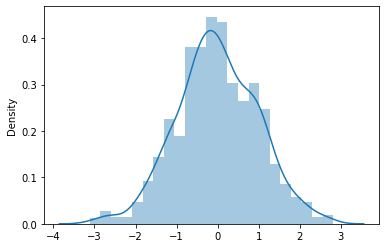

In [ ]:
sns.distplot(x)

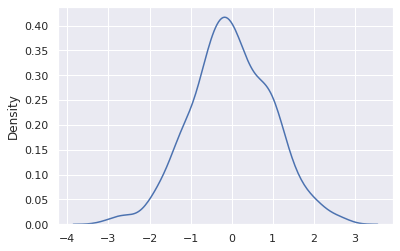

In [ ]:
sns.kdeplot(x)

In [ ]:
y=np.random.uniform(size=1000)

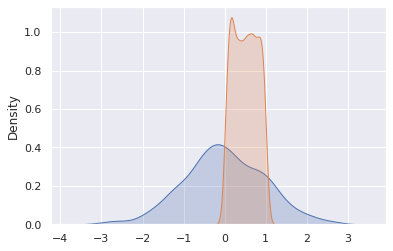

In [ ]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [ ]:
d=sns.load_dataset('diamonds')

In [ ]:
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


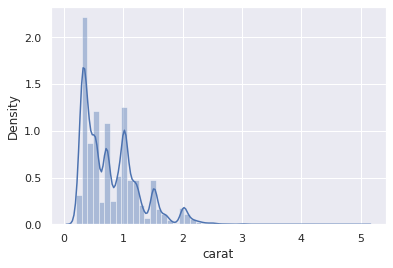

In [ ]:
sns.distplot(d.carat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


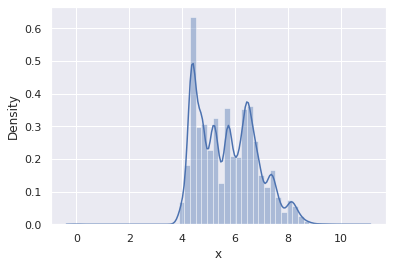

In [ ]:
sns.distplot(d['x'])

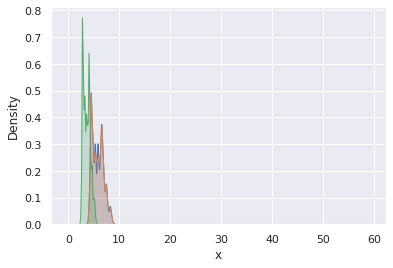

In [ ]:
sns.kdeplot(d.x,shade=True)
sns.kdeplot(d.y,shade=True)
sns.kdeplot(d.z,shade=True)

box plot 


In [ ]:
x=np.random.normal(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


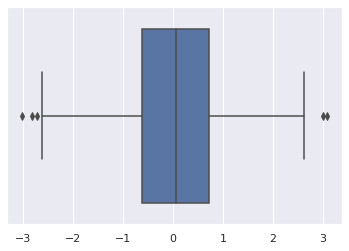

In [ ]:
sns.boxplot(x)

distribution of categorical variable

In [ ]:
#on diamond dataset 
c=d.groupby('cut')['cut'].count()
c

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

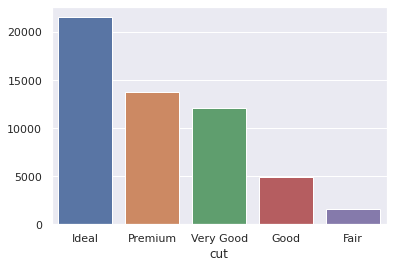

In [ ]:
sns.barplot(x=c.index,y=c.values)

joint distribution of two variabel 

In [ ]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)

In [ ]:
df=pd.DataFrame({'x':x,'y':y})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


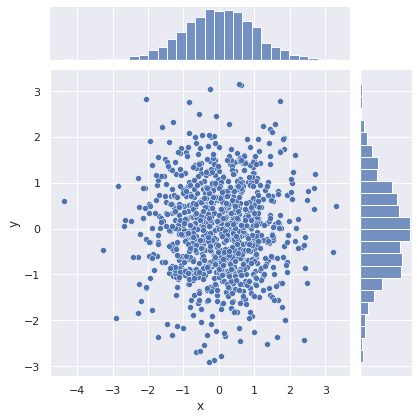

In [ ]:
sns.jointplot('x','y',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


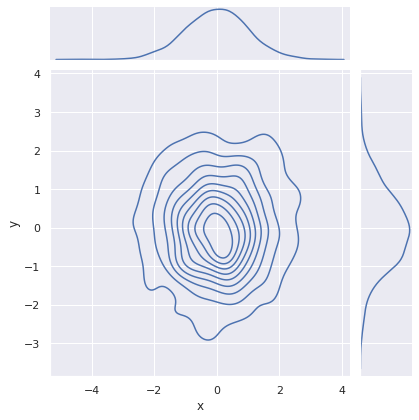

In [ ]:
sns.jointplot('x','y',data=df,kind='kde')

swarn plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


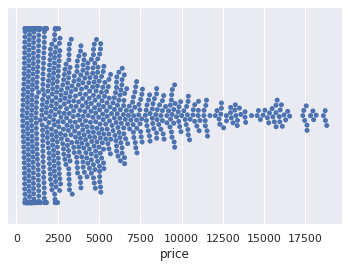

In [ ]:
sns.swarmplot(d.sample(1000).price)

violin plot

In [ ]:
p=sns.load_dataset('penguins')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


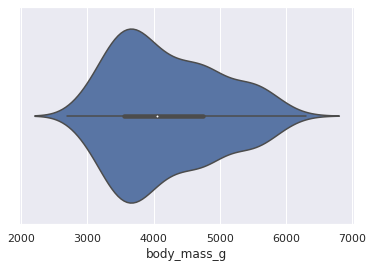

In [ ]:
sns.violinplot(p.body_mass_g)

In [ ]:
#multiple violin plots 

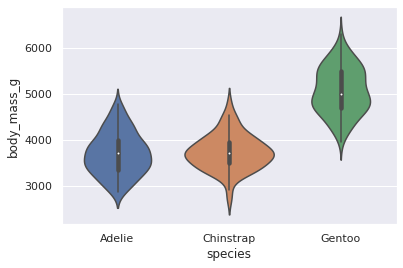

In [ ]:
sns.violinplot(x='species',y='body_mass_g',data=p,orient='v')

In [ ]:
#paired violin plot

In [ ]:
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


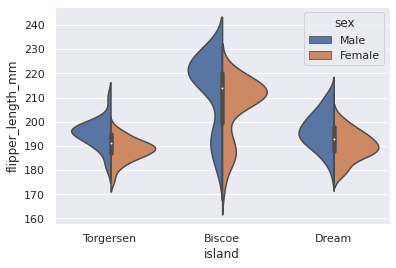

In [ ]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',split=True,data=p)

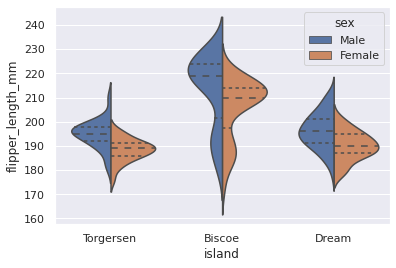

In [ ]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',split=True,inner='quartile',data=p)

faceted plotting (making three plots side by side so we can compare)

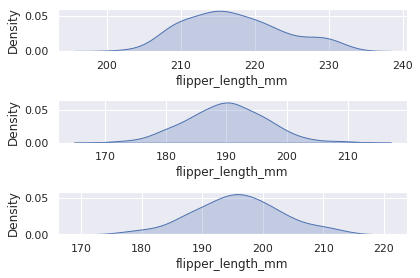

In [ ]:
fig,axs=plt.subplots(nrows=3)
sns.kdeplot(p[p.species=='Gentoo'].flipper_length_mm,shade=True,ax=axs[0]);
sns.kdeplot(p[p.species=='Adelie'].flipper_length_mm,shade=True,ax=axs[1]);
sns.kdeplot(p[p.species=='Chinstrap'].flipper_length_mm,shade=True,ax=axs[2]);
plt.tight_layout()

pair plot

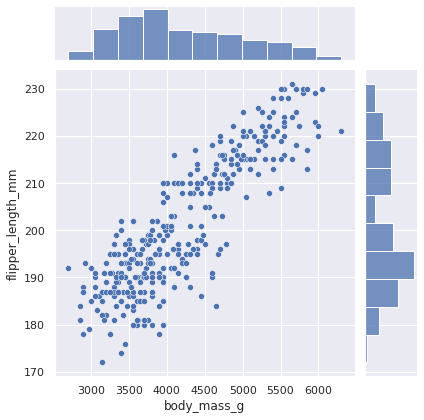

In [ ]:
sns.jointplot(x=p.body_mass_g,y=p.flipper_length_mm)

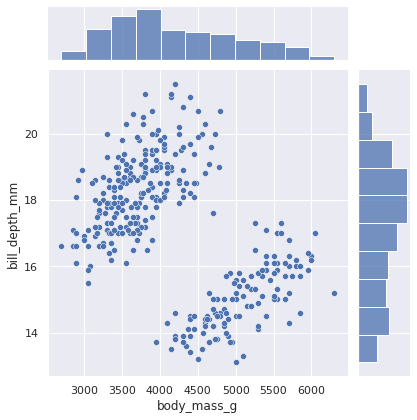

In [ ]:
sns.jointplot(x=p.body_mass_g,y= p.bill_depth_mm)

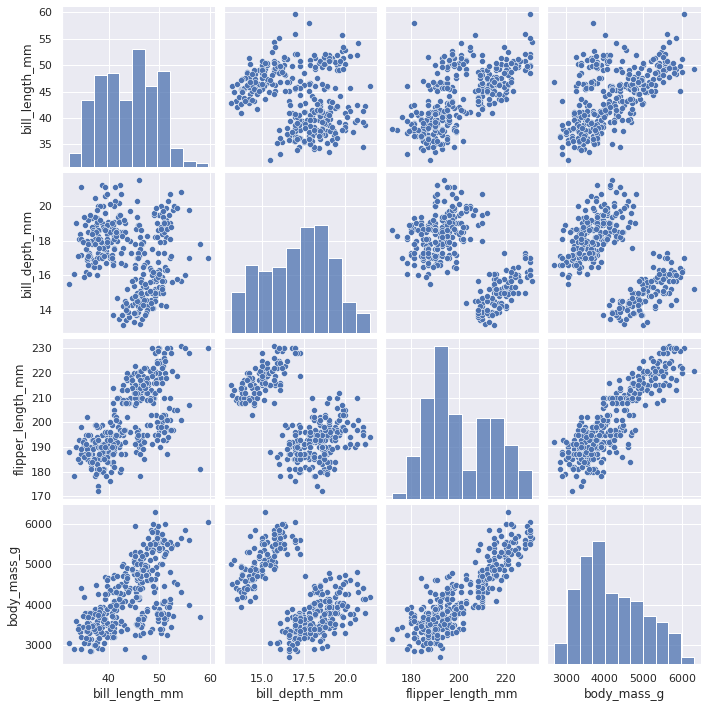

In [ ]:
sns.pairplot(p)

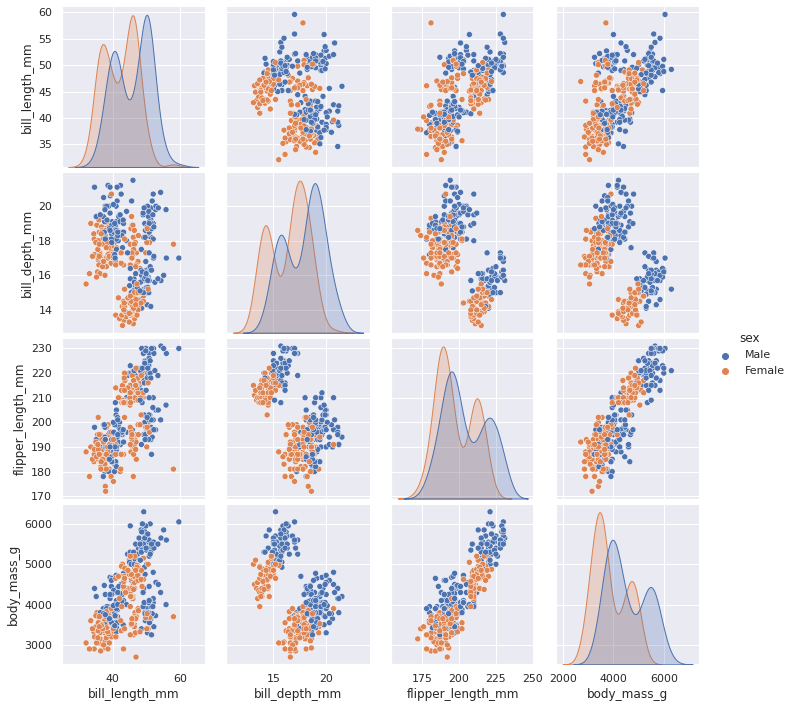

In [ ]:
sns.pairplot(p,hue='sex')

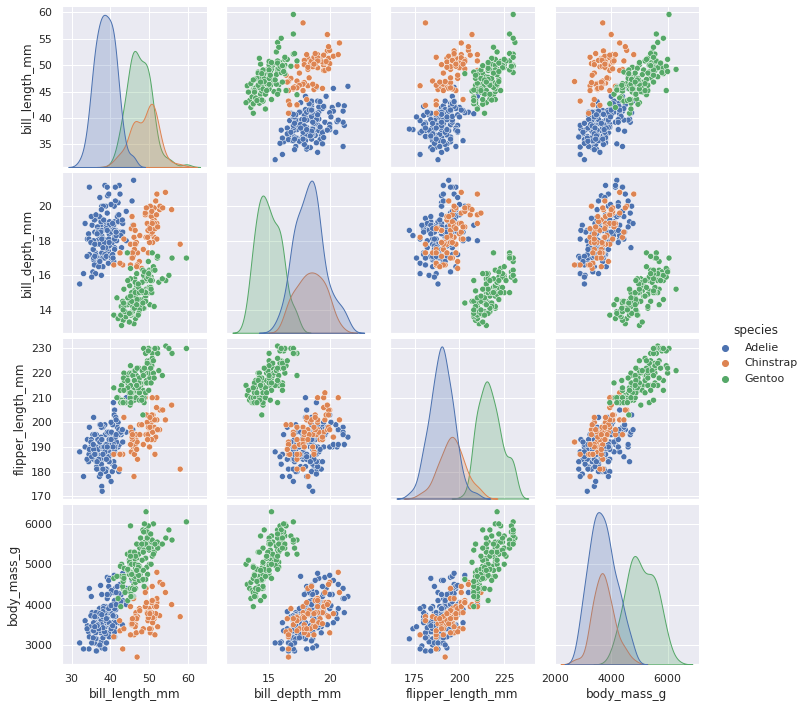

In [ ]:
sns.pairplot(p,hue='species')

boxen plot


In [ ]:
sns.boxenplot(<data as series>) 